# Proyecto ICH1104 - Mecánica de Fluidos

Integrantes:
* Pablo Carrasco
* Benjamín Rendic
* Andrés Reyes
* Daniel Sebastián

## Setup

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [26]:
data = scipy.io.loadmat('data.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed May 17 09:27:12 2023',
 '__version__': '1.0',
 '__globals__': [],
 'D': array([[0.0208]]),
 'U0': array([[0.27926347]], dtype=float32),
 'c': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
      

## Parte 1: Procesamiento de datos

### Actividad 1: Tratamiento de *outliers*

In [27]:
u = data['u']
v = data['v']
x = data['x']
y = data['y']

In [28]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'D', 'U0', 'c', 'f', 'nu', 'rho', 'u', 'v', 'x', 'y'])

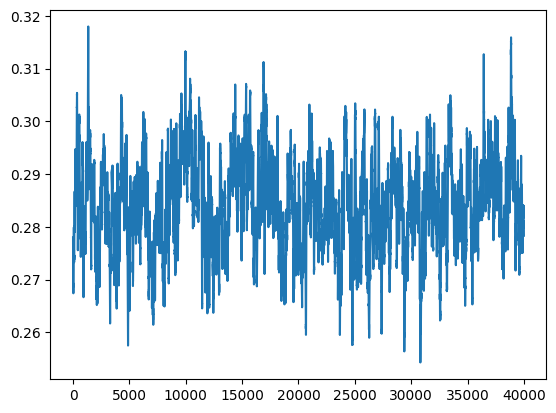

In [29]:
u_mean = np.mean(u, axis=(0, 1))
plt.plot(u_mean)

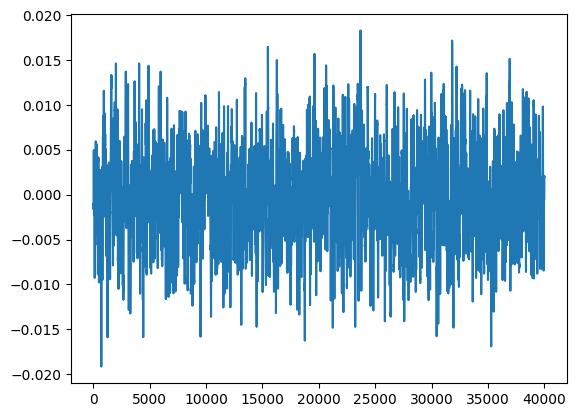

In [30]:
v_mean = np.mean(v, axis=(0, 1))
plt.plot(v_mean)

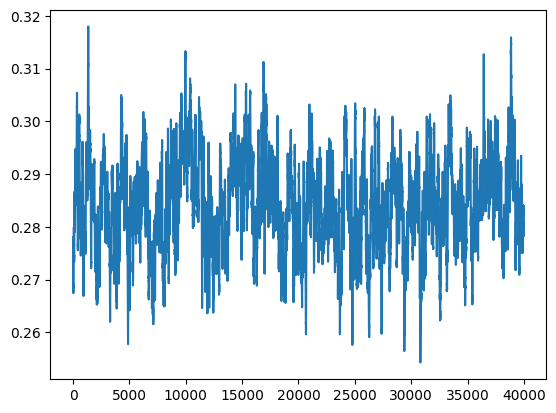

In [34]:
vel = np.linalg.norm([u_mean, v_mean], axis=0)
plt.plot(vel)

In [35]:
f = vel
N = len(vel)
dt = 1 / 39999
t = dt * np.arange(N)

In [38]:
fhat = np.fft.fft(f, N)
psd = fhat * np.conj(fhat) / N
freq = (1 / (dt)) * np.arange(N)

In [39]:
l = np.arange(0, np.floor(N / 2), dtype='int')
filter = psd > 50
fhat_clean = fhat * filter
f_clean = np.fft.ifft(fhat_clean)

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


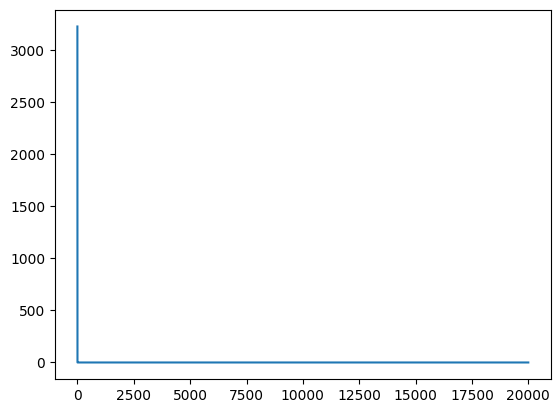

In [45]:
plt.plot(psd[l])

### Actividad 2: Reemplazo de vectores